<a href="https://colab.research.google.com/github/VinoJose/Deep-learning-with-Python/blob/master/Classifying_newswires_a_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

2.2.0-rc3


In [0]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


Preparing data

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results



In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

The built-in way of doing this in Keras

In [0]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4282 - accuracy: 0.7027 - val_loss: 1.3108 - val_accuracy: 0.7170
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0563 - accuracy: 0.7724 - val_loss: 1.1313 - val_accuracy: 0.7580
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8307 - accuracy: 0.8276 - val_loss: 1.0250 - val_accuracy: 0.7850
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6616 - accuracy: 0.8639 - val_loss: 0.9694 - val_accuracy: 0.7970
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5292 - accuracy: 0.8921 - val_loss: 0.9227 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4290 - accuracy: 0.9114 - val_loss: 0.9039 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.3459 - accuracy: 0.9281 - val_loss: 0.8728 - val_accuracy: 0.8210
Epoch 8/20
16

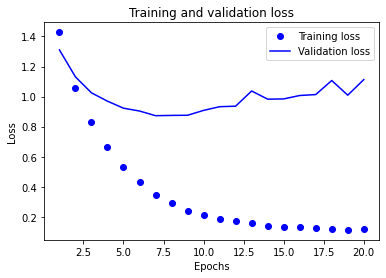

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

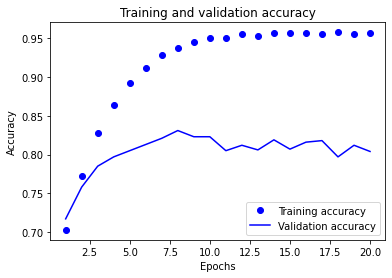

In [0]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Retraining a model from scratch

In [0]:
model = keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 73ms/step - loss: 2.5866 - accuracy: 0.4982 - val_loss: 1.7548 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 1s 81ms/step - loss: 1.4417 - accuracy: 0.7081 - val_loss: 1.3582 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 1s 78ms/step - loss: 1.0778 - accuracy: 0.7724 - val_loss: 1.1568 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 1s 77ms/step - loss: 0.8373 - accuracy: 0.8229 - val_loss: 1.0513 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 75ms/step - loss: 0.6593 - accuracy: 0.8648 - val_loss: 0.9859 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 78ms/step - loss: 0.5294 - accuracy: 0.8925 - val_loss: 0.9567 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 64ms/step - loss: 0.4232 - accuracy: 0.9116 - val_loss: 0.9397 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [0]:
results

[1.0297276973724365, 0.7809438705444336]

Generating predictions on new data

In [0]:
predictions = model.predict(x_test)

In [0]:
np.argmax(predictions[0])

4

In [0]:
y_train = np.array(train_labels)

In [0]:
train_labels, y_train

(array([ 3,  4,  3, ..., 25,  3, 25]), array([ 3,  4,  3, ..., 25,  3, 25]))